In [24]:
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
import contextily as ctx
import matplotlib
import matplotlib.pyplot as plt

# Select the Data you want to look at 

In [10]:
dictionary = {}
data = sorted(glob.glob('EnergyData/*.geojson'))
for dt in tqdm_notebook(data):
    date = dt.split('/')[1].split('_')[0]
    hour = dt.split('/')[1].split('_')[1]
    direction = dt.split('/')[1].split('_')[-1].split(".")[0]
    # select your date, hour and direction here
    if date == "2020-03-10": # change this line
        try:
            dictionary[date]["%s_%s" %(hour,direction)] = gpd.read_file(dt,driver='GeoJSON')
        except:
            dictionary[date] = {}
            dictionary[date]["%s_%s" %(hour,direction)] = gpd.read_file(dt,driver='GeoJSON')
        

/Users/jseverin/anaconda3/envs/energyPipeline/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


# What does this data look like?


In [31]:
date = "2020-03-10"
hour ='8'
direction = 'AB'
dictionary[date]["%s_%s" %(hour,direction)].head()

,ID,volume,speed_mph_float,miles,energy,energy_per_mile,grade_percent_float,num_lanes_int,geometry,X,Y
0,111,1160.751465,64.22,0.143626,0.005420,0.037738,3.893686,2,"LINESTRING (-85.29431 35.12604, -85.29404 35.1...",-85.293836,35.126997
1,284,1471.122192,46.27,0.423833,0.018633,0.043963,5.131263,1,"LINESTRING (-85.29593 35.12220, -85.29574 35.1...",-85.294661,35.125093
2,1101,1503.095947,41.97,0.089040,0.001081,0.012137,-2.093575,2,"LINESTRING (-85.28459 35.12683, -85.28404 35.1...",-85.284311,35.127438
3,1198,1090.553467,36.04,0.240757,0.002362,0.009811,-3.097084,2,"LINESTRING (-85.24755 35.12522, -85.24648 35.1...",-85.247011,35.126913
4,1583,1633.565918,37.62,0.152478,0.007929,0.051998,8.000000,2,"LINESTRING (-85.33605 35.12688, -85.33485 35.1...",-85.335446,35.127873


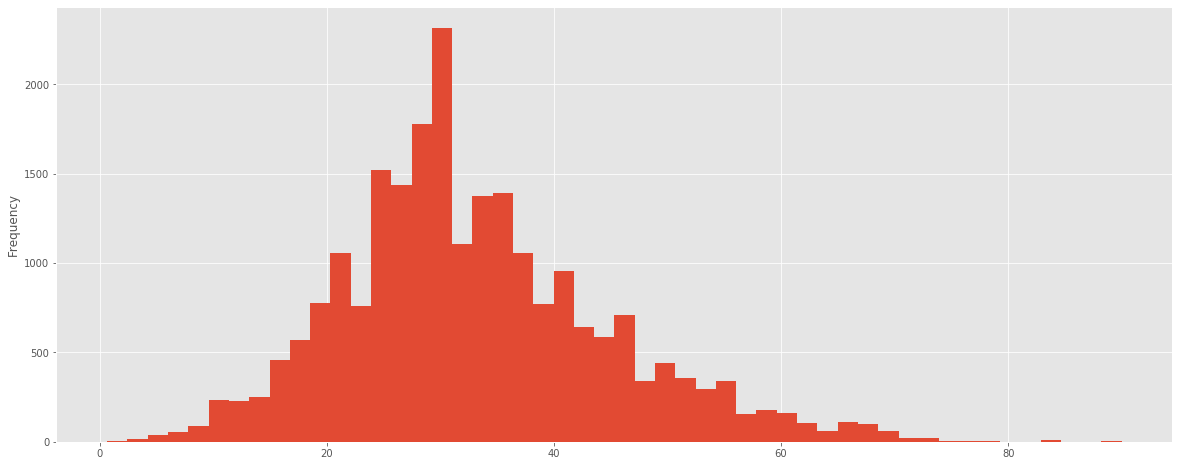

In [32]:
plt.style.use('ggplot')
metric = 'speed_mph_float'
dictionary[date]["%s_%s" %(hour,direction)][metric].plot(kind='hist',
                                                figsize=(20,8),
                                                        bins=50)

# Visualize the Data

In [11]:
def get_x(geom):
    return geom.centroid.x
def get_y(geom):
    return geom.centroid.y

def bounding_box(data,
                Left = -85.3363,
                Right = -85.13,
                Top = 35.1793,
                Bottom = 34.9867):
    
    data['X'] = data['geometry'].apply(get_x)
    data['Y'] = data['geometry'].apply(get_y)
    bounded = data[data['X'].between(Left,Right) & data['Y'].between(Bottom,Top)].copy()
    return bounded
def select_road(net,roadName):
    tmp = net.loc[net['RTE_NME']==roadName]
    return tmp


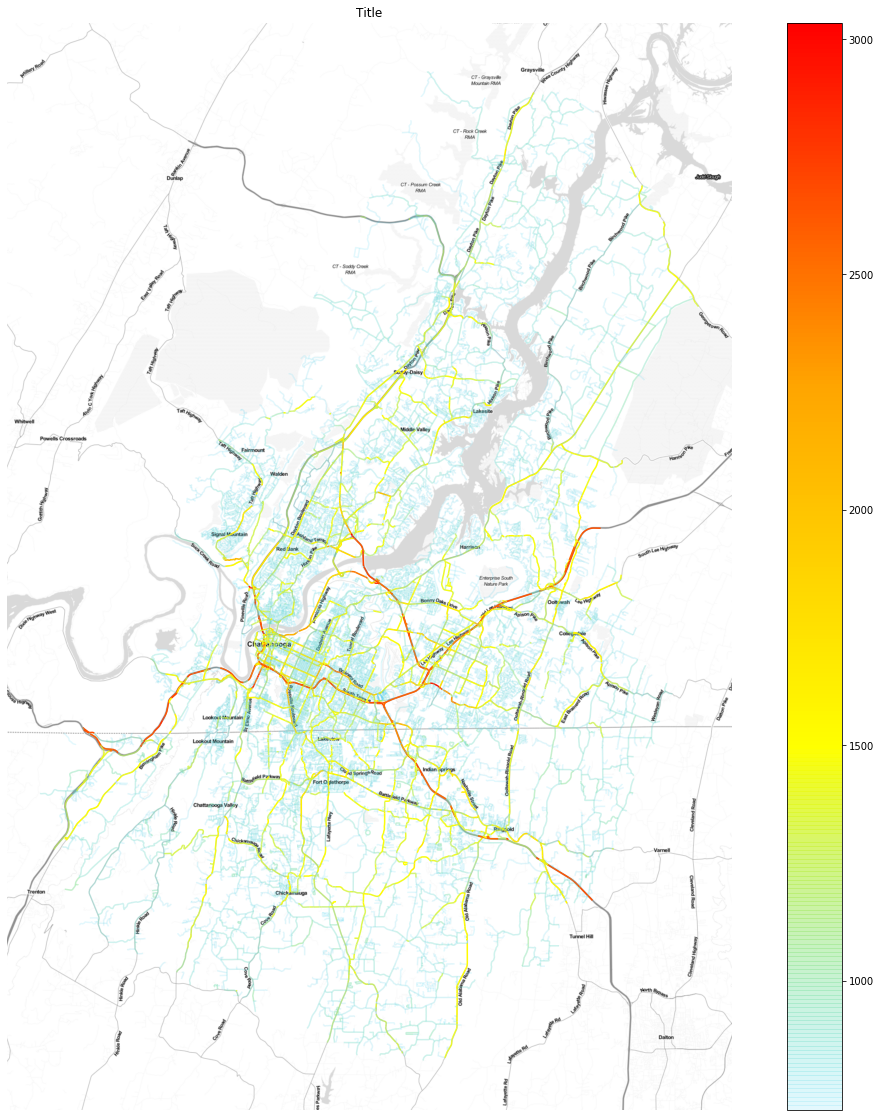

In [20]:
date = '2020-03-10'
hour = '8'
direction = 'AB' # direction is arbitary. defined by TPO
metric = 'volume' # other option: speed_mph_float	energy	energy_per_mile	


ST_TONER_LITE = 'http://tile.stamen.com/toner-lite/tileZ/tileX/tileY.png'
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#42d4f525","yellow","orange","red"])
tmp = dictionary[date]["%s_%s" %(hour,direction)].to_crs(epsg=3857) 
ax = tmp.plot(figsize=(20,20),
         cmap=cmap,
         column=metric,
         legend=True)
ctx.add_basemap(ax,zoom=12,url=ST_TONER_LITE)
ax.set_title("Title")
ax.set_axis_off()

# Clipping the network

to clip you network you will need the Lat and Long of all your boundaries for example:
```python 
clipped = bounding_box(dictionary[date]["%s_%s" %(hour,direction)],
                      Left = -85.3363,
                      Right = -85.13,
                      Top = 35.1793,
                      Bottom = 34.9867)
```

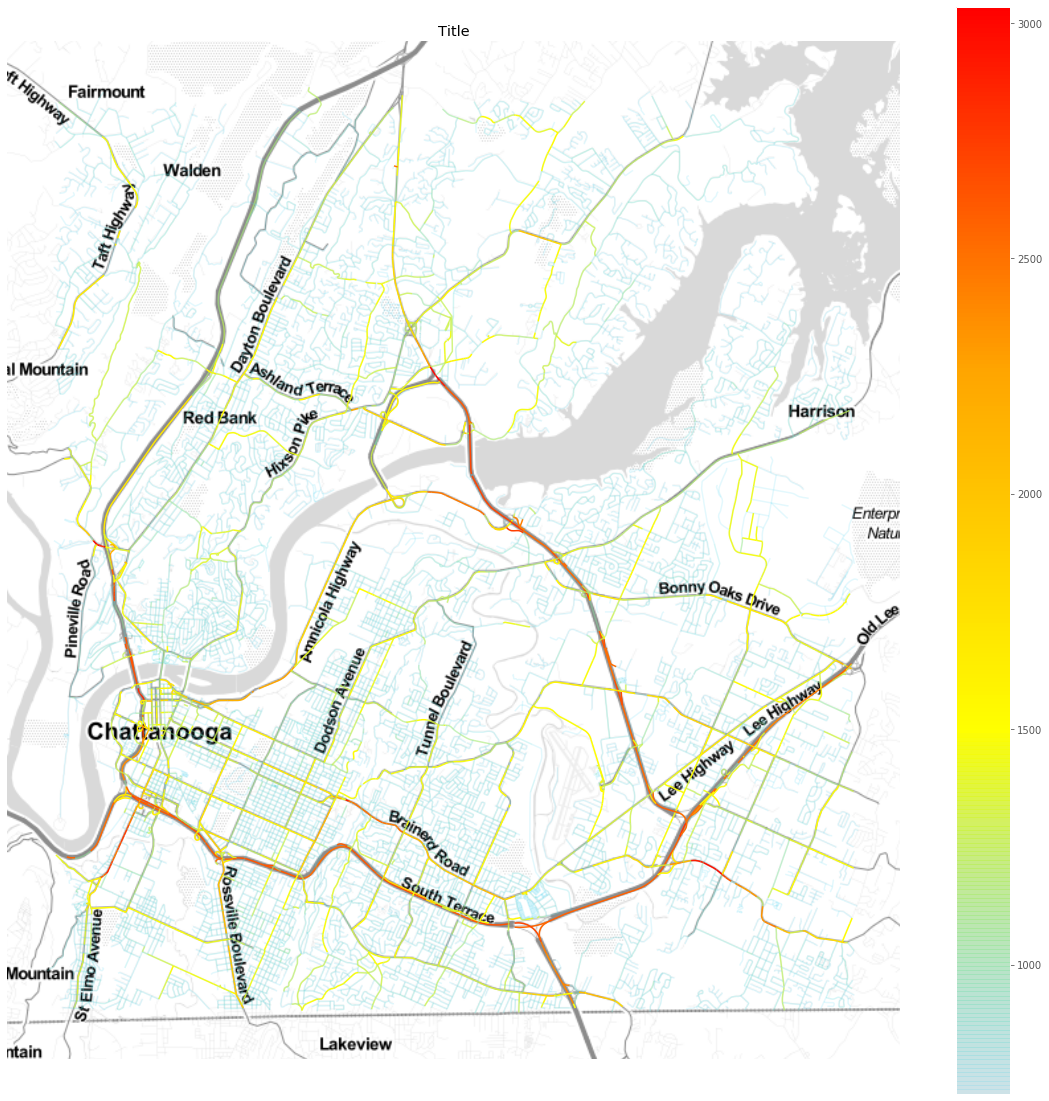

In [30]:
clipped = bounding_box(dictionary[date]["%s_%s" %(hour,direction)])

date = '2020-03-10'
hour = '8'
direction = 'AB' # direction is arbitary. defined by TPO
metric = 'volume' # other option: speed_mph_float	energy	energy_per_mile	

tmp = clipped.to_crs(epsg=3857) 
ax = tmp.plot(figsize=(20,20),
         cmap=cmap,
         column=metric,
         legend=True)
ctx.add_basemap(ax,zoom=12,url=ST_TONER_LITE)
ax.set_title("Title")
ax.set_axis_off()